# Import important packages

We now import the important libraries for manipulating the data and bulding the machine learning pridictive models. we firstly download the TensorFlow package for building our models then import it to our notebook. for reading and manipulating our data, we import and use the pandas library. Since we will need to split our data into training and testing, we import the train_test_spit library.

In [228]:
#import the pandas package to perform data loading, manipulations and analysis.
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pickle

# Data Loading

We now load the data collected from the simulation which was stored in the excel file, we load this data in the pandas dataframe to manipulate it and perform data analysis processes. the data is loaded in the df variable.

In [2]:
#data loading
df=pd.read_excel('Research_collected_data_for_building_the_model.xlsx',index_col=False)

We now view the data loaded in the df data frame variable.

In [3]:
df

,'num_of_transmission','Initial_transmission','retransmission','number_of_retransmission','transport_block_size','bits_to_transmit','coded_data','modulated_data','SNR','channel_data','demodulated_data','decoded_data','block_crc','Acknoledgement','ACK/NACK'
0,1,1,0,0,32,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,'''[1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 ...,'''[0.9487+0.3162i -0.9487+0.3162i -0.3162-0.9...,-11.153851,'''[-1.1186+0.0784i -8.4676+4.2393i 3.357-2.42...,'''[-1.11856999500713 -0.0783578035969243 0.48...,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,False,1,'ACK'
1,2,1,0,0,32,'[1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 ...,'''[0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 ...,'''[-0.9487+0.3162i -0.3162-0.3162i 0.3162+0.3...,-2.137236,'''[-0.5844+0.1459i -1.3557-1.726i 0.1223-0.28...,'''[-0.584367570459123 -0.145923308212743 -0.0...,'[1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 ...,False,1,'ACK'
2,3,1,0,0,32,'[1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 ...,'''[0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 ...,'''[-0.9487+0.3162i -0.3162-0.3162i 0.9487-0.9...,-21.205587,'''[-0.9688+2.1498i -3.491-8.8376i -8.5119+3.8...,'''[-0.968800179363594 -2.1498137950507 0.3363...,'[1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 ...,True,0,'NACK'
3,3,0,1,1,32,'[1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 ...,'''[1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 ...,'''[0.9487+0.9487i 0.3162+0.3162i -0.9487-0.31...,-21.205587,'''[-11.3262+9.5143i 2.7073-13.3458i 7.908-5.5...,'''[-11.3261651698457 -9.51426725704367 10.693...,'[1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 ...,True,0,'NACK'
4,3,0,1,2,32,'[1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 ...,'''[1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 ...,'''[0.9487-0.9487i 0.9487+0.3162i -0.3162-0.94...,-21.205587,'''[-5.5593-3.0496i 10.1895+8.0987i -9.0316-3....,'''[-5.55926575924465 3.049574135715 4.9268102...,'[1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 ...,True,0,'NACK'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,5998,1,0,0,256,'''[1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 ...,'''[0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 ...,'''[-0.3162-0.3162i -0.9487-0.3162i 0.9487-0.3...,15.126483,'''[-0.067-0.4535i -1.0772-0.3193i 0.9451-0.18...,'''[-0.0669967237952275 0.453476472106764 -0.5...,'''[1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 ...,False,1,'ACK'
9691,5999,1,0,0,256,'''[0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 ...,'''[0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 ...,'''[-0.9487+0.3162i -0.9487-0.9487i -0.3162+0....,9.787344,'''[-0.869+0.7203i -1.0129-1.4799i -0.7796+0.4...,'''[-0.869040296624749 -0.720284280133994 0.23...,'''[0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 ...,False,1,'ACK'
9692,6000,1,0,0,256,'''[0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 ...,'''[1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 ...,'''[0.3162-0.3162i -0.3162-0.9487i 0.3162+0.31...,-12.478976,'''[0.0828-0.7845i -5.6671+2.8703i -4.0718+1.1...,'''[0.0827927999277413 0.784486103770216 -0.54...,'''[0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 ...,True,0,'NACK'
9693,6000,0,1,1,256,'''[0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 ...,'''[1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 ...,'''[0.3162-0.9487i 0.9487+0.9487i 0.9487-0.316...,-12.478976,'''[-2.4219-0.7954i 1.386+0.8291i -1.3689-6.13...,'''[-2.42189835320053 0.795423786045274 1.7894...,'''[0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 ...,True,0,'NACK'


#  Exploratory Data Analysis (EDA)

To understand our data we perform the exploratory data analysis (EDA), we firstly check the columns of our data generated during the simulations as shown in the code below.

In [4]:
df.dtypes

'num_of_transmission'           int64
'Initial_transmission'          int64
'retransmission'                int64
'number_of_retransmission'      int64
'transport_block_size'          int64
'bits_to_transmit'             object
'coded_data'                   object
'modulated_data'               object
'SNR'                         float64
'channel_data'                 object
'demodulated_data'             object
'decoded_data'                 object
'block_crc'                      bool
'Acknoledgement'                int64
'ACK/NACK'                     object
dtype: object

From the code above, we can see that our data have 15 columns:

1) num_of_transmission: which indicates the number of new transmission without including or counting the retransmission.

2) Initial_transmission: indicates whether the current transmission is the initial transmission (presented by 1) or the retransmission (presented by 0) 

3) retransmission: indicates whether the current transmission is the retransmission (presented by 1) of the previously nagatively-acknowledged transmission 

4) number_of_retransmission: presents the number of retransmission for a failed transmission.

5) transport_block_size: is the number of bits or the size of the block transmitted for each transmission.

6) bits_to_transmit: is the actual data to be transmitted, is in the form of binary numbers

7) coded_data: is the encoded data generated by the turbo decoder after passing the actual data to the turbo decoder,it has the CRC added to it for error corrections 
               and detection, it is in the form of binary numbers.

8) modulated_data: is the data generated by the modulator after passing the encoded data to the 16QAM modulator, the data is the form of complex numbers.

9) SNR: is the noise added to the channel during the transmission of data from sender to the channel.

10) channel_data: is the data transmitted to the receiver and generated by the channel after passing the modulated data to the channel. This data is in the form of
                  complex numbers with some noise added to it.

11) demodulated_data: is the demodulated data, which is generated by the 16QAM demodulator on the receiver. this data will is passed to the decoder after being
                      demodulated

12) decoded_data: Is the data generated by the turbo decoder, the sender use this data and the CRC in this data to check if any error occured during the transmission

13) block_crc: is the CRC value, used to determine if an error have occured during the transmission of data. presented by true if error have occured and false if not.

14) Acknoledgement: presents  whether the transmission was successful or not, 1 present successful transmission and 0 presents unsuccessful transmission and re
                    questing  the retransmission of packets

15) ACK/NACK: presents the feedback sent to the transmitter for each transmission. NACK presents unssucessful transmission requesting the retransmission, ACK presents
              successful transmission and the TIMEOUT presents unssuccessful transmission but does not require the retransmission because the maximum number of retransmission is reached.

We now look at the information about our data.

from the output of the code below, we can see that there are 9695 total transmission made during the simulations, these also includes the number of the retransmitted data

In [5]:
total_number_of_transmission=df.count()[0];
print(total_number_of_transmission);


9695


The output of the code below display the total number of failed initial transmission which is 4390, it does not include the retransission. 

In [6]:
total_failed_initial_transmission=df.loc[(df["'Acknoledgement'"] ==0) & (df["'Initial_transmission'"] == 1)]
total_failed_initial_transmission["'num_of_transmission'"].count()

1610

The output of the code below shows the total of transmissions that were successfully transmitted withot any retransmission.

In [7]:
total_successful_initial_transmission=df.loc[(df["'Acknoledgement'"] ==1) & (df["'Initial_transmission'"] == 1)]
total_successful_initial_transmission["'num_of_transmission'"].count()

4390

In [43]:
total_failed_transmission=df.loc[(df["'Acknoledgement'"] ==0)]
total_failed_transmission["'Acknoledgement'"].count()

4381

In [48]:
total_transmission=6000
print(total_transmission);

6000


In [55]:
total_successful_retransmission=df.loc[(df["'Acknoledgement'"] ==1) & (df["'retransmission'"] == 1)]
print(total_successful_retransmission["'retransmission'"].count())

924


In [62]:
successful_transmission=df.loc[(df["'Acknoledgement'"] ==1)]
successful_transmission.groupby(["'number_of_retransmission'"])["'number_of_retransmission'"].count()

'number_of_retransmission'
0    4390
1     490
2     155
3     279
Name: 'number_of_retransmission', dtype: int64

we now look at the relationships between various features that can help us to build the models. we have two tables acquired during the simulation to identify the relationship betwee the SNR, the packet size and the acknowledgment

## SNR analysis

In [12]:
df_SNR=pd.read_excel('SNR_data.xlsx')

In [13]:
SNR_failed=df_SNR.groupby(["'SNR'","'Acknoledgement'"],as_index=False)["'ACK/NACK'"].count()
#SNR_failed=pd.DataFrame(SNR_failed);
SNR_failed=pd.DataFrame(SNR_failed)
SNR_failed.rename(columns={"'SNR'":'SNR',"'Acknoledgement'":'Acknoledgement',"'ACK/NACK'":'ACK'},inplace=True)
SNR_failed

,SNR,Acknoledgement,ACK
0,-20,0,4
1,-18,0,4
2,-16,0,4
3,-14,0,4
4,-12,0,4
5,-10,0,2
6,-10,1,1
7,-8,0,1
8,-8,1,1
9,-6,0,1


In [24]:
SNRR=SNR_failed.loc[SNR_failed["Acknoledgement"]==0]
SNRR


,SNR,Acknoledgement,ACK
0,-20,0,4
1,-18,0,4
2,-16,0,4
3,-14,0,4
4,-12,0,4
5,-10,0,2
7,-8,0,1
9,-6,0,1


From the graph below, we can see that as the signal strength increases, the number of failed transmission decreases. which means that the increasing the signal strength will result in successful transmission. This implies that the SNR is one of the factors affecting the feedback, therefore for this reason, we will use the SNR to build our model.

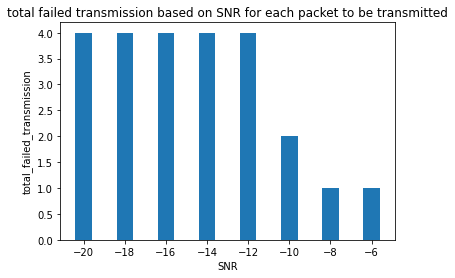

<Figure size 216x216 with 0 Axes>

In [27]:
plt.bar(SNRR['SNR'],SNRR['ACK'])
plt.xlabel('SNR')
plt.ylabel('total_failed_transmission')
plt.title('total failed transmission based on SNR for each packet to be transmitted')
plt.figure(figsize=(3, 3))
plt.show()


## packet size analysis

The table below shows the simulation conducted for different transmissions of different packet size to investigate the effect of the packet size on the feedback. in order to build a model that predicts the feedback based on the packet size.

In [8]:
packet_df=pd.read_excel("packet_size_data_for_simulation.xlsx");
packet_df

,'num_of_transmission','Initial_transmission','retransmission','number_of_retransmission','transport_block_size','bits_to_transmit','coded_data','modulated_data','SNR','channel_data','demodulated_data','decoded_data','block_crc','Acknoledgement','ACK/NACK'
0,1,1,0,0,32,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,'''[1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 ...,'''[0.9487+0.3162i -0.9487+0.3162i -0.3162-0.9...,-9,'''[-1.1815+2.3385i -2.5619+0.1306i -6.1839+2....,'''[-1.18146616111501 -2.33848033714211 0.5490...,'[1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 ...,False,1,'ACK'
1,2,1,0,0,64,'''[1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 ...,'''[0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 ...,'''[-0.9487+0.3162i 0.3162+0.3162i 0.9487-0.31...,-9,'''[-0.3209+0.5397i -3.4187-0.7816i 0.6367-1.4...,'''[-0.320934590127423 -0.5397250717625 -0.311...,'''[1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 ...,False,1,'ACK'
2,3,1,0,0,128,'''[1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 ...,'''[0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 ...,'''[-0.9487+0.3162i 0.3162+0.3162i 0.3162-0.31...,-9,'''[-0.1331+4.13i -0.6172-3.6598i 1.9686-3.629...,'''[-0.133146714059411 -4.12996137586337 -0.49...,'''[1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 ...,False,1,'ACK'
3,4,1,0,0,256,'''[1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 ...,'''[1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 ...,'''[0.9487+0.9487i 0.3162+0.3162i -0.3162+0.94...,-9,'''[1.288-0.9097i -1.8453+3.9351i -0.2124-0.29...,'''[1.2880147322365 0.909689937575074 0.655559...,'''[1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 ...,False,1,'ACK'
4,5,1,0,0,512,'''[0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 ...,'''[1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 ...,'''[0.9487-0.9487i 0.9487-0.9487i 0.9487+0.948...,-9,'''[0.8841-4.9089i -0.4252-1.5022i 0.1139+2.84...,'''[0.884084652021694 4.90889057393489 0.25162...,'''[0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 ...,True,0,'NACK'
5,5,0,1,1,512,'''[0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 ...,'''[0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 ...,'''[-0.9487+0.3162i -0.9487+0.9487i 0.3162+0.3...,-9,'''[-0.9047+3.569i 0.0776+0.9695i 2.9933-1.586...,'''[-0.904697045859391 -3.56903531543335 0.272...,'''[0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 ...,False,1,'ACK'
6,6,1,0,0,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 ...,'''[-0.9487+0.3162i 0.3162-0.9487i 0.3162+0.94...,-9,'''[2.9388+1.7062i 0.3939-7.0136i -1.4389-1.39...,'''[2.93884462056884 -1.70622947708669 2.30638...,'''[1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 ...,True,0,'NACK'
7,6,0,1,1,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 ...,'''[-0.9487+0.3162i 0.9487-0.9487i -0.3162-0.9...,-9,'''[-1.8219-1.6764i -1.803+0.3947i -1.2355-0.0...,'''[-1.8219465235569 1.67639316401387 1.189490...,'''[1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 ...,True,0,'NACK'
8,6,0,1,2,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 ...,'''[0.3162-0.9487i 0.3162-0.3162i -0.9487-0.31...,-9,'''[4.0525+0.4278i -1.0783-2.8591i -1.2674-0.4...,'''[4.05245435168119 -0.427808482829987 3.4199...,'''[0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,True,0,'NACK'
9,6,0,1,3,1024,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,'''[1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 ...,'''[0.9487+0.3162i -0.3162+0.3162i -0.9487-0.3...,-9,'''[-1.0725-0.6455i 0.4338+2.5165i -0.781-1.95...,'''[-1.07252728136286 0.645534404983233 0.4400...,'''[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 ...,False,1,'ACK'


In [51]:
packet_df1=packet_df.groupby(["'transport_block_size'","'Acknoledgement'"],as_index=False)["'ACK/NACK'"].count()
#SNR_failed=pd.DataFrame(SNR_failed);
#SNR_failed=pd.DataFrame(SNR_failed)
#SNR_failed.rename(columns={"'SNR'":'SNR',"'Acknoledgement'":'Acknoledgement',"'ACK/NACK'":'ACK'},inplace=True)
#SNR_failed
packet_df2=packet_df1[packet_df["'Acknoledgement'"]==0]




packet_df2=packet_df2.drop(packet_df2[packet_df2["'Acknoledgement'"] ==1].index)

#packet_df2["'Acknoledgement'"]

packet_df2


/tmp/ipykernel_30250/1680607405.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  packet_df2=packet_df1[packet_df["'Acknoledgement'"]==0]


,'transport_block_size','Acknoledgement','ACK/NACK'
4,512,0,1
6,1024,0,3
8,2048,0,4


Text(0.5, 1.0, 'total failed transmission for different packet size')

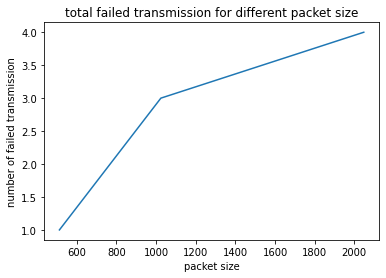

In [53]:
plt.plot(packet_df2["'transport_block_size'"],packet_df2["'ACK/NACK'"])
plt.xlabel("packet size");
plt.ylabel("number of failed transmission")
plt.title("total failed transmission for different packet size")

from the picture above, we can see that the packet the number of failed transmission is lower when the packet size is smaller, so this shows that the packet size do affect the the feedback generated at the receiver for each transmission. 

# Feature Engineering

This section prepare and ensure that the data is ready for building the model. firtly we check for the number of nulls in each column   

From the output of the code below, we can see that our data does not have nulls, therefore, there is no data cleaning required for our project

In [60]:
df.isnull().sum()

'num_of_transmission'         0
'Initial_transmission'        0
'retransmission'              0
'number_of_retransmission'    0
'transport_block_size'        0
'bits_to_transmit'            0
'coded_data'                  0
'modulated_data'              0
'SNR'                         0
'channel_data'                0
'demodulated_data'            0
'decoded_data'                0
'block_crc'                   0
'Acknoledgement'              0
'ACK/NACK'                    0
dtype: int64

Since our data is clean, we now split it into training and testing dataset.

In [111]:
x=df[["'retransmission'","'number_of_retransmission'","'transport_block_size'","'SNR'"]];
y=df[["'Acknoledgement'"]]

In [112]:
y.reset_index(drop=True, inplace=True)

In [113]:
y=y.to_numpy()

In [131]:
y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [133]:
l=[]
for i in y :
    l.append(i[0]);

In [137]:
y=l

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

Now our data is clean and is divided into training and testting dataset, which means that we can now build the model.

# Model Building

### Logistic Regression

We now create our logistic regression model to predict the feedback for various transmission.

In [144]:
lr= LogisticRegression(random_state = 50)

In [145]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=50)

In [146]:
y_pred=lr.predict(X_test)

In [185]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [186]:
f1_lr=f1_score(y_test, y_pred, average='macro')

### Random forest classifier

In [219]:
rf=RandomForestClassifier(n_estimators=100,max_depth=10, random_state=100)

In [220]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=100)

In [221]:
y_pred_rf=rf.predict(X_test)

In [222]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

0.18726885356961243

In [223]:
f1_rf=f1_score(y_test, y_pred_rf, average='macro')
f1_rf

0.9647744638105518

### Support vector machine

In [224]:
svm= svm.SVC()

AttributeError: 'SVC' object has no attribute 'SVC'

In [213]:
svm.fit(X_train,y_train);

In [214]:
y_pred_svm=svm.predict(X_test)

In [215]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm))

0.30213269782736435

In [216]:
f1_svm=f1_score(y_test, y_pred_svm, average='macro')

# model evaluation

<BarContainer object of 3 artists>

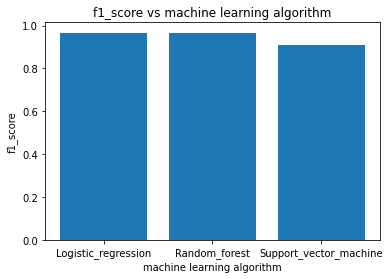

In [225]:
x=[f1_lr,f1_rf,f1_svm];
y=['Logistic_regression','Random_forest','Support_vector_machine']
plt.xlabel('machine learning algorithm')
plt.ylabel('f1_score')
plt.title('f1_score vs machine learning algorithm')
plt.bar(y,x)

the graph above shows the f1_score of the machine learning algorithms developed, and from the results we can see that the logistic regression algorithm have the highest f1_score which means that it has the higher prediction accuracy, therefore for this reason, our study will use the logistic regression

# Model Saving

### saving the logistic regression model

In [232]:
#saving  the logistic regression model to the pickle file
pickle.dump(lr, open('lr_model.pkl', 'wb'))